<a href="https://colab.research.google.com/github/akatjizeu/Data-Science/blob/main/deakin-bridging/business-stats/ENews_Express_Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

## Import all the necessary libraries

In [3]:
# Installing the libraries with the specified version.
#!pip install pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 numpy==1.25.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



## Reading the Data into a DataFrame

In [5]:
data = pd.read_csv('abtest.csv')
data.head(10)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
5,546558,control,old,5.28,yes,English
6,546448,treatment,new,5.25,yes,French
7,546581,control,old,6.53,yes,Spanish
8,546461,treatment,new,10.71,yes,French
9,546548,control,old,2.08,no,English


* There are 4 categorical variables(**group, landing_page, converted, langague_preferred**) in our dataset and only one usable integer variable(**time_spent_on_the_page**)
* The **user_id** column is just an identifier it has no significant value in our problem resolution efforts, so we will drop it.

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
#Viewing the first and last 5 rows
pd.concat([data.head(), data.tail()])

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
#Ch3kcing the shape of the dataset
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in the dataset')

There are 100 rows and 6 columns in the dataset


In [6]:
#Getting the statistical summary of the numerical data
data.describe(include=[np.number])

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


* There are no mossing values for **user_id** and **time_spent_on_the_page**  as the count for each of the columns is 100
* The average time a user spent on the landing page is 5 minutes 37 seconds.
* The maximum time a user spent on the landing page is 10 minutes
* The minimum time a user spen on the landing page is 0.19 seconds
* The mean and the 50th percentile(median) are almost equal which might suggest a normal distribution of **time_spent_on_the_page**

In [9]:
#Getting the statistical summary of the numerical data
data.describe(include=['object'])

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


* We do not to have missing values in the all the categorical variables
* There are 2 categories of each of the following columns (**group, landing_page and converted**) and 3 categories for **language_preferred**
* On the converted variable, *'yes'* is the most frequent while *'spanish'* is the most preferred language

In [10]:
#Check for missing values
data.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


* There are no missing values in the dataset

In [14]:
#Check for duplicates
data.duplicated().sum()

np.int64(0)

* There are no duplicates in the dataset

### Univariate Analysis

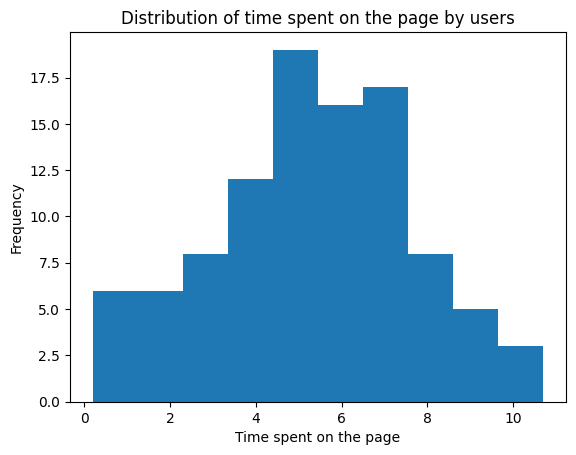

In [20]:
#Univariate analysis for time_spent_on_the_page
#Draw a distribution graph
plt.hist(data['time_spent_on_the_page'], bins=10)
plt.xlabel('Time spent on the page')
plt.ylabel('Frequency')
plt.title('Distribution of time spent on the page by users');

* The distribution shows an almost normal distributiton for this column
*

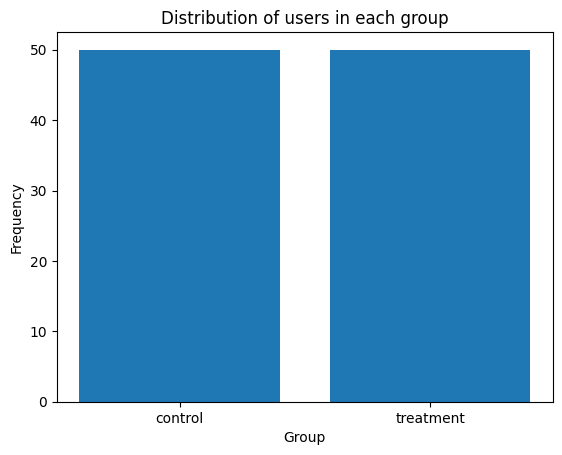

In [22]:
plt.bar(data['group'].value_counts().index, data['group'].value_counts())
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.title('Distribution of users in each group');

* There is an equal number of users for each of the control and treatment groups

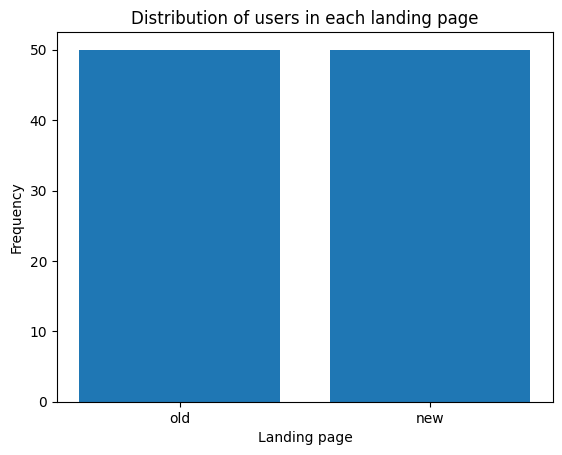

In [23]:
plt.bar(data['landing_page'].value_counts().index, data['landing_page'].value_counts())
plt.xlabel('Landing page')
plt.ylabel('Frequency')
plt.title('Distribution of users in each landing page');

* The is an equal distribution of users in each of the new and old pages

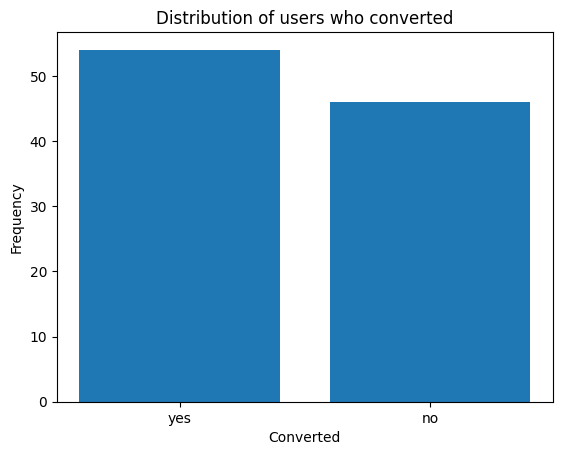

In [24]:
plt.bar(data['converted'].value_counts().index, data['converted'].value_counts())
plt.xlabel('Converted')
plt.ylabel('Frequency')
plt.title('Distribution of users who converted');

* Users who converted are a little more than those who did not convert

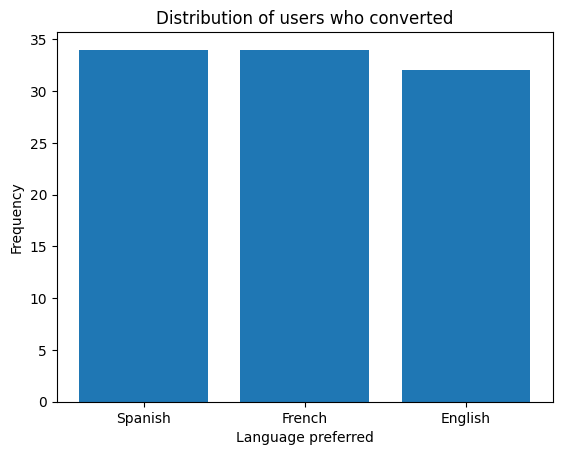

In [25]:
plt.bar(data['language_preferred'].value_counts().index, data['language_preferred'].value_counts())
plt.xlabel('Language preferred')
plt.ylabel('Frequency')
plt.title('Distribution of users who converted');

* There is an equal number of users who prefer spanish and French
* Fewer users prefer English

### Bivariate Analysis

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

### Step 1: Define the null and alternate hypotheses

**null hypothesis** ($H₀$) and the **alternative hypothesis** ($Ha$)

### Step 2: Select Appropriate test

### Step 3: Decide the significance level

### Step 4: Collect and prepare data

### Step 5: Calculate the p-value

### Step 6: Compare the p-value with $\alpha$

### Step 7:  Draw inference

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

## 3. Is the conversion and preferred language are independent or related?

## 4. Is the time spent on the new page same for the different language users?

## Conclusion and Business Recommendations

___